<a href="https://colab.research.google.com/github/Haris-09/Machine-Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = {
    "outlook": ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
    "temperature": ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
    "humidity": ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
    "wind": ['weak', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'weak', 'weak', 'strong', 'strong', 'weak', 'strong'],
    "play": ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}
df = pd.DataFrame(data)
display(df)

,outlook,temperature,humidity,wind,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rainy,mild,high,weak,yes
4,rainy,cool,normal,weak,yes
5,rainy,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rainy,mild,normal,weak,yes


In [2]:
import math
# Entropy calculation
def entropy(target_col):
    values = target_col.value_counts(normalize=True)
    return -sum(p * math.log2(p) for p in values)

# Information Gain calculation
def information_gain(df, feature, target='play'):
    total_entropy = entropy(df[target])
    values = df[feature].unique()

    weighted_entropy = 0
    for value in values:
        subset = df[df[feature] == value]
        weight = len(subset) / len(df)
        subset_entropy = entropy(subset[target])
        weighted_entropy += weight * subset_entropy

    return total_entropy - weighted_entropy

# Calculate and print results
entropy_total = entropy(df['play'])
info_gains = {
    feature: information_gain(df, feature, target='play')
    for feature in ['outlook', 'temperature', 'humidity', 'wind']
}

print(f"Total Entropy: {entropy_total:.4f}")
for feature, ig in info_gains.items():
    print(f"Information Gain for {feature}: {ig:.4f}")

Total Entropy: 0.9403
Information Gain for outlook: 0.2467
Information Gain for temperature: 0.0292
Information Gain for humidity: 0.1518
Information Gain for wind: 0.0481


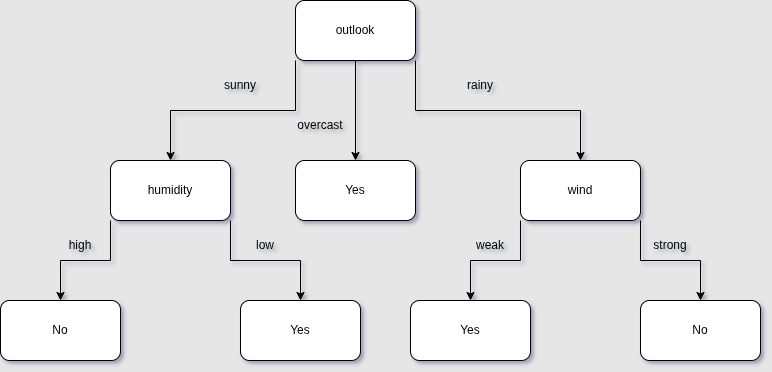
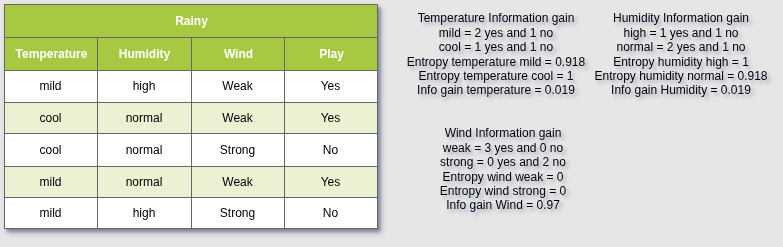

### Decision Tree Classifier using sklearn

In [3]:
data = [
    ['sunny', 'hot', 'high', 'weak', 'no'],
    ['sunny', 'hot', 'high', 'strong', 'no'],
    ['overcast', 'hot', 'high', 'weak', 'yes'],
    ['rainy', 'mild', 'high', 'weak', 'yes'],
    ['rainy', 'cool', 'normal', 'weak', 'yes'],
    ['rainy', 'cool', 'normal', 'strong', 'no'],
    ['overcast', 'cool', 'normal', 'strong', 'yes'],
    ['sunny', 'mild', 'high', 'weak', 'no'],
    ['sunny', 'cool', 'normal', 'weak', 'yes'],
    ['rainy', 'mild', 'normal', 'weak', 'yes'],
    ['sunny', 'mild', 'normal', 'strong', 'yes'],
    ['overcast', 'mild', 'high', 'strong', 'yes'],
    ['overcast', 'hot', 'normal', 'weak', 'yes'],
    ['rainy', 'mild', 'high', 'strong', 'no']
]

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [5]:
import pandas as pd
df = pd.DataFrame(data, columns=['outlook', 'temperature', 'humidity', 'wind', 'play'])
display(df)

,outlook,temperature,humidity,wind,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rainy,mild,high,weak,yes
4,rainy,cool,normal,weak,yes
5,rainy,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rainy,mild,normal,weak,yes


In [6]:
obj1 = LabelEncoder()

In [7]:
for i in df.columns:
    df[i] = obj1.fit_transform(df[i])

In [8]:
display(df)

,outlook,temperature,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [9]:
y = df['play']
x = df.drop('play', axis=1)
display(x)

,outlook,temperature,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [10]:
dt = DecisionTreeClassifier()
model = dt.fit(x, y)

In [11]:
prediction = model.predict(x)
display(prediction)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [12]:
y.values

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [13]:
# sunny=2 hot=1 normal=1 weak=1
prediction = model.predict([[2, 1, 1, 1]])
display(prediction)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

### Entropy and Information Gain Calculation

In [14]:
import pandas as pd
df = pd.DataFrame(data, columns=['outlook', 'temperature', 'humidity', 'wind', 'play'])
display(df)

,outlook,temperature,humidity,wind,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rainy,mild,high,weak,yes
4,rainy,cool,normal,weak,yes
5,rainy,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rainy,mild,normal,weak,yes


In [15]:
import math

def Entropy(target_col):
    values_count = target_col.value_counts().values
    total_count = target_col.count()
    return -sum(value_count/total_count * math.log2(value_count/total_count) for value_count in values_count)

def information_gain(df, feature, target='play'):
    total_entropy = Entropy(df[target])

    df_feature = df.groupby(feature)[target].agg([Entropy, "count"])
    entrtopies_feature = df_feature['Entropy'].values
    counts_feature = df_feature['count'].values

    entropy_feature = 0
    for entropy, count in zip(entrtopies_feature, counts_feature):
        entropy_feature += entropy * count/len(df)

    return total_entropy-entropy_feature

In [16]:
print(f"Total Entropy: {Entropy(df['play']):.4f}")

for featurue in df.columns[:-1]:
    print(f"Information Gain for {featurue}: {information_gain(df, featurue):.4f}")

Total Entropy: 0.9403
Information Gain for outlook: 0.2467
Information Gain for temperature: 0.0292
Information Gain for humidity: 0.1518
Information Gain for wind: 0.0481
